# How does a simple model behave?

To improve my intuition for how the fitness model behaves, I decided to generate some sample data and visualize their predicted frequency values using fixed beta values for a single predictor.
To do this, I need to have a sample of viruses that each have an assigned fitness predictor value.
Then I need to select a range of possible beta values to use.
Finally, I need to generate the predicted frequencies from the model with each beta value using the strain predictor values.

This approach requires a lot of assumptions and it might be easier to just start with a comparison of how beta values alter the predicted growth of a single virus across a range of plausible frequencies.
Viruses can range in frequency from 0.01 to 0.05.
Beta values can range from -2 to 2.

## Visualize the effects of beta values on a single virus

In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# Configure matplotlib theme.
sns.set_style("ticks")
fontsize = 14
matplotlib_params = {
    'axes.labelsize': fontsize,
    'font.size': fontsize,
    'legend.fontsize': 12,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'text.usetex': False,
    'figure.figsize': [6, 4],
    'savefig.dpi': 300,
    'figure.dpi': 120,
    'text.usetex': False
}

plt.rcParams.update(matplotlib_params)

# Turn off spines for all plots.
plt.rc("axes.spines", top=False, right=False)

Viruses can range in frequency from 0.01 to 0.05. Beta values can range from -2 to 2.

The growth formula is just:

$$
x_{i}(t + \Delta{t}) = x_{i}(t)\exp(\beta{f_{i}})
$$

For the purpose of this exercise, let's assume the fitness value for this virus, $f_{i}$, is standardized such that its mean is zero.
We also want to see how the model behaves for a range of these values.

In [3]:
initial_frequency = 0.02
fitness = 1.0
delta_time = np.linspace(0, 3.0, 12 * 3)

In [4]:
delta_time

array([0.        , 0.08571429, 0.17142857, 0.25714286, 0.34285714,
       0.42857143, 0.51428571, 0.6       , 0.68571429, 0.77142857,
       0.85714286, 0.94285714, 1.02857143, 1.11428571, 1.2       ,
       1.28571429, 1.37142857, 1.45714286, 1.54285714, 1.62857143,
       1.71428571, 1.8       , 1.88571429, 1.97142857, 2.05714286,
       2.14285714, 2.22857143, 2.31428571, 2.4       , 2.48571429,
       2.57142857, 2.65714286, 2.74285714, 2.82857143, 2.91428571,
       3.        ])

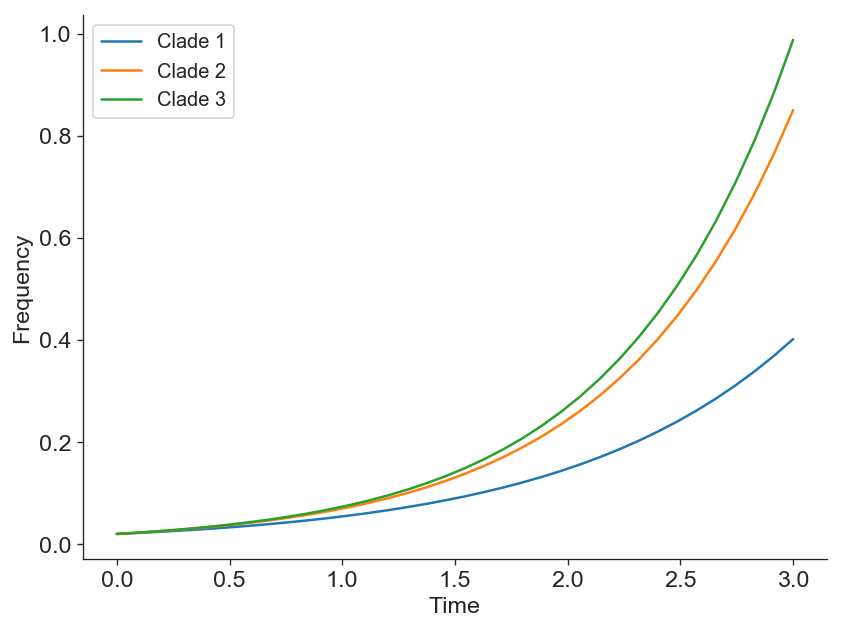

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(
    delta_time,
    initial_frequency * np.exp(fitness * delta_time),
    label="Clade 1"
)

fitness_2 = 1.25
ax.plot(
    delta_time,
    initial_frequency * np.exp(fitness_2 * delta_time),
    label="Clade 2"
)

fitness_3 = 1.3
ax.plot(
    delta_time,
    initial_frequency * np.exp(fitness_3 * delta_time),
    label="Clade 3"
)

ax.set_xlabel("Time")
ax.set_ylabel("Frequency")
ax.legend()

In [6]:
virus_1 = initial_frequency * np.exp(fitness * delta_time)
virus_2 = initial_frequency * np.exp(fitness_2 * delta_time)
virus_3 = initial_frequency * np.exp(fitness_3 * delta_time)

In [7]:
total_viruses = (virus_1 + virus_2 + virus_3)

In [8]:
virus_1 / total_viruses

array([0.33333333, 0.32811547, 0.32293872, 0.31780401, 0.31271225,
       0.3076643 , 0.30266098, 0.29770308, 0.29279134, 0.28792648,
       0.28310916, 0.27834001, 0.27361962, 0.26894856, 0.26432732,
       0.25975639, 0.25523621, 0.25076718, 0.24634966, 0.24198399,
       0.23767046, 0.23340932, 0.2292008 , 0.22504509, 0.22094233,
       0.21689267, 0.21289617, 0.20895292, 0.20506292, 0.20122619,
       0.19744268, 0.19371235, 0.19003511, 0.18641084, 0.1828394 ,
       0.17932063])

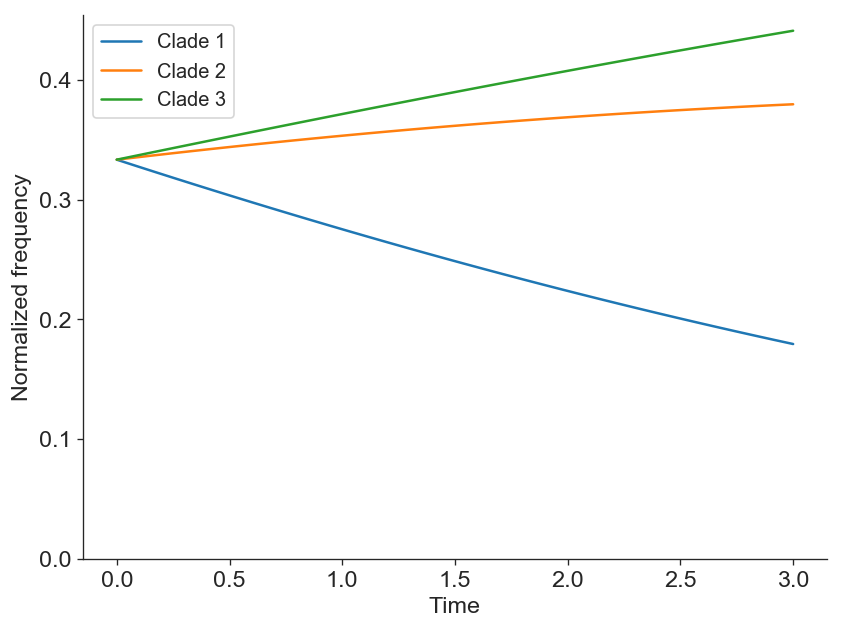

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(
    delta_time,
    virus_1 / total_viruses,
    label="Clade 1"
)

ax.plot(
    delta_time,
    virus_2 / total_viruses,
    label="Clade 2"
)

ax.plot(
    delta_time,
    virus_3 / total_viruses,
    label="Clade 3"
)

ax.set_xlabel("Time")
ax.set_ylabel("Normalized frequency")
ax.set_ylim(bottom=0.0)
ax.legend()

## How are logit frequencies distributed compared to standard frequencies?

In [11]:
pc = 1e-4

In [38]:
freq = np.array([pc, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 1 - 0.001, 1 - pc])

In [39]:
freq

array([1.000e-04, 1.000e-03, 1.000e-02, 5.000e-02, 1.000e-01, 2.000e-01,
       3.000e-01, 4.000e-01, 5.000e-01, 6.000e-01, 7.000e-01, 8.000e-01,
       9.000e-01, 9.900e-01, 9.990e-01, 9.999e-01])

In [40]:
def logit(freq, pc=1e-4):
    return np.log(np.maximum(freq, pc) / np.maximum(pc,(1-freq)))

In [41]:
logit(freq)

array([-9.21024037, -6.90675478, -4.59511985, -2.94443898, -2.19722458,
       -1.38629436, -0.84729786, -0.40546511,  0.        ,  0.40546511,
        0.84729786,  1.38629436,  2.19722458,  4.59511985,  6.90675478,
        9.21024037])

In [47]:
freq[np.argwhere(logit(freq) == 0)]

array([[0.5]])

Text(0,0.5,'logit(frequency)')

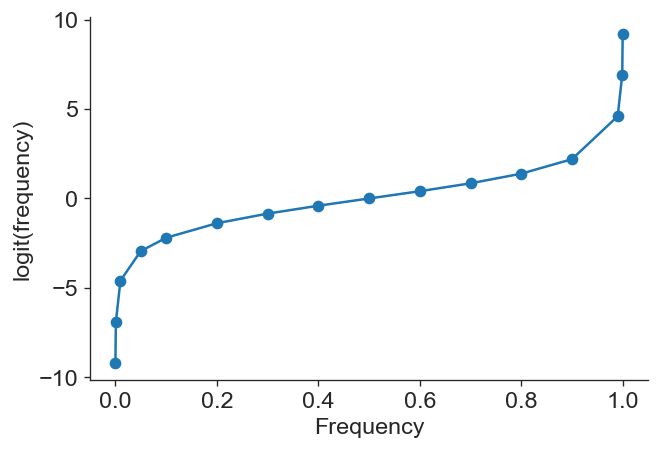

In [43]:
plt.plot(freq, logit(freq), marker="o")
plt.xlabel("Frequency")
plt.ylabel("logit(frequency)")